In [1]:
#importing libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [2]:
df_listings = pd.read_csv('C:/Users/kimhy/Documents/listings.csv')
df_venues = pd.read_csv('C:/Users/kimhy/Documents/venues.csv.gz', compression='gzip')

In [3]:
df_venues_new_orleans = df_venues[df_venues['city'] == 'new orleans']
df_venues_new_orleans.isna().sum()

city            0
id              0
latitude        0
longitude       0
name            0
rating       9397
types           0
dtype: int64

In [4]:
df_venues_new_orleans.shape

(18880, 7)

#### There seems to be a substantial amount of missing values in the rating column for austin. Instead of replacing these values with mean values for the overall rating, I believe repalcing these values with 0 would present a more accurate picture. 

#### Usually a place with no rating generally means there are not enough people visiting that place to give it any sort of rating

#### Additionally, the lowest rating possible is 1 as shown by the above block of code. Thus if we give NaN values a 0 rating, it help to distinguish them from the rest who have ratings.

In [6]:
df_venues_new_orleans.fillna(0, inplace=True) 

C:\Users\kimhy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
df_venues_new_orleans.isna().sum()

city         0
id           0
latitude     0
longitude    0
name         0
rating       0
types        0
dtype: int64

In [8]:
df_listings_new_orleans = df_listings[df_listings['metropolitan'] == 'new_orleans']

#### Now for plotting

C:\Users\kimhy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


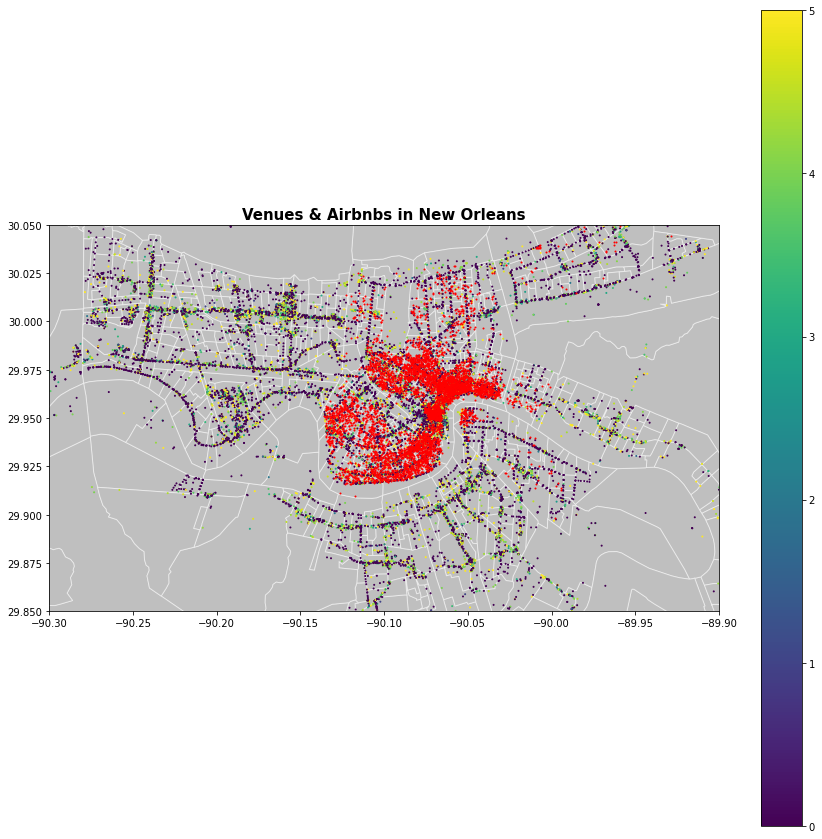

In [13]:
# import street map
street_map = gpd.read_file(r'C:\Users\kimhy\Documents\cb_2018_22_bg_500k.shp')
# designate coordinate system
crs = {'init':'epsg:4326'}
# zip x and y coordinates into single feature
geometry_venues = [Point(xy) for xy in zip(df_venues_new_orleans['longitude'], df_venues_new_orleans['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df_venues_new_orleans, crs = crs, geometry = geometry_venues)

geometry_listings = [Point(xy) for xy in zip(df_listings_new_orleans['longitude'], df_listings_new_orleans['latitude'])]
listing_geo_df = gpd.GeoDataFrame(df_listings_new_orleans, crs=crs, geometry = geometry_listings)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.5,color='grey',edgecolor='white')

# adding geodataframe to axes
# assign 'rating' variable to represent coordinates on graph for venues 
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize

#plotting the venues
geo_df.plot(column='rating',ax=ax,alpha=1, legend=True,markersize=1)
#plotting the listings of Airbnb 
listing_geo_df.plot( c = 'red', ax=ax, alpha=1, legend=True, markersize=1)


# add title to graph
plt.title('Venues & Airbnbs in New Orleans', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display (LA)
plt.xlim(-90.3,-89.9)
plt.ylim( 29.85,30.05)

# show map
plt.show()